# **2.3.1. Загрузка данных и первичный анализ**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Уберем предупреждения, чтобы они не загромождали вывод
import warnings
warnings.filterwarnings('ignore')

1. Импортировать необходимые библиотеки

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, roc_auc_score, roc_curve,
    precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

2. Загрузить датасет `S05-hw-dataset.csv` в `pandas.DataFrame` с помощью `pd.read_csv`.

In [4]:
df = pd.read_csv('/content/drive/MyDrive/seminars/S05/S05-hw-dataset.csv')

3. Вывести и проанализировать:
   - первые строки датасета (`head()`),
   - информацию о столбцах и типах (`info()`),
   - базовые описательные статистики для числовых признаков (`describe()` или аналог),
   - распределение целевого признака `default` (например, через `value_counts(normalize=True)`).

In [5]:
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [8]:
df.describe().round(2)

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.0,3000.0,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00
mean,1500.50,45.06,69658.99,19.58,649.29,0.28,3.49,6.87,0.5,0.5,20607.26,5559.68,0.40,9.52,1.98,6.97,0.41
std,866.17,14.19,24742.24,11.38,69.96,0.16,2.29,4.29,0.5,0.5,14035.21,6306.03,0.20,5.78,1.41,4.35,0.49
min,1.00,21.00,15000.00,0.00,402.00,0.01,0.00,0.00,0.0,0.0,0.00,-3000.00,0.00,0.00,0.00,0.00,0.00
25%,750.75,33.00,52641.75,10.00,604.00,0.16,1.00,3.00,0.0,0.0,9612.25,341.50,0.24,5.00,1.00,3.00,0.00
50%,1500.50,45.00,69784.50,20.00,647.00,0.26,3.00,7.00,0.0,1.0,20021.00,5114.50,0.38,10.00,2.00,7.00,0.00
75%,2250.25,57.00,85874.25,29.00,697.00,0.39,6.00,10.00,1.0,1.0,30101.25,9906.25,0.55,15.00,3.00,11.00,1.00
max,3000.00,69.00,156351.00,39.00,850.00,0.88,7.00,14.00,1.0,1.0,75237.00,29335.00,0.96,19.00,4.00,14.00,1.00


In [9]:
target_dist = df['default'].value_counts(normalize=True)
print(target_dist)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64


In [10]:
print(f"Количество наблюдений: {df.shape[0]}")
print(f"Количество признаков: {df.shape[1]}")

Количество наблюдений: 3000
Количество признаков: 17


4. Кратко (несколько предложений) зафиксировать наблюдения:
   - сколько объектов и признаков в датасете;
   - есть ли явные аномалии (например, явно невозможные значения);
   - как распределён таргет (баланс классов).


Объем данных: Датасет содержит 3000 объектов (клиентов) и 17 признаков (16 признаков + целевая переменная default).
Аномалии:

Возраст клиентов варьируется от 21 до 69 лет (средний 45 лет), что соответствует реальным данным.

Доход (income) имеет диапазон от 15,000 до 156,351 со средним значением 69,659.

credit_score находится в диапазоне 402-850 (среднее 649), что соответствует стандартным скоринговым системам.

debt_to_income в пределах 0.01-0.88 (среднее 0.28), что логично для этого показателя.

checking_balance имеет отрицательные значения (минимальное -3000), что может указывать на овердрафт.

savings_balance имеет нулевые значения (минимальное 0), что нормально для клиентов без сбережений.

Пропущенных значений в датасете не обнаружено.

Баланс классов: Среднее значение default составляет 0.41, что означает примерно 41% клиентов с дефолтом и 59% без дефолта. 75-й перцентиль равен 1, что подтверждает, что около 25% данных имеют дефолт. Задача является умеренно несбалансированной.

# 2.3.2. Подготовка признаков и таргета

1. Выделить матрицу признаков `X` и вектор таргета `y`:
   - таргет – столбец `default`;
   - в качестве признаков использовать все остальные осмысленные столбцы (кроме `client_id`, который можно удалить или не использовать в `X`).
2. При необходимости выполнить простую предобработку:
   - убедиться, что все используемые признаки числовые;
   - при желании можно явно проверить диапазоны (например, что `debt_to_income` в [0, 1]).

3. Никаких сложных преобразований (one-hot, генерация фич и т.п.) не требуется – цель HW05 в другом. По желанию, вы можете их добавить, но это не обязательно для зачёта.

In [11]:
# Таргет - столбец default
y = df['default']

# Признаки - все столбцы кроме default и client_id
X = df.drop(columns=['default', 'client_id'])

print(f"Размер матрицы признаков X: {X.shape}")
print(f"Размер целевой переменной y: {y.shape}")

### 2.2. Проверка типов данных
print(f"\nТипы данных признаков:")
print(X.dtypes)

### 2.3. Проверка диапазонов ключевых признаков
print("\nПроверка диапазонов признаков:")
print(f"debt_to_income: [{X['debt_to_income'].min():.2f}, {X['debt_to_income'].max():.2f}]")
print(f"region_risk_score: [{X['region_risk_score'].min():.2f}, {X['region_risk_score'].max():.2f}]")
print(f"age: [{X['age'].min()}, {X['age'].max()}]")
print(f"credit_score: [{X['credit_score'].min()}, {X['credit_score'].max()}]")

# Все признаки уже числовые, дополнительная предобработка не требуется
print("\n Все признаки числовые, предобработка завершена.")

Размер матрицы признаков X: (3000, 15)
Размер целевой переменной y: (3000,)

Типы данных признаков:
age                                 int64
income                              int64
years_employed                      int64
credit_score                        int64
debt_to_income                    float64
num_credit_cards                    int64
num_late_payments                   int64
has_mortgage                        int64
has_car_loan                        int64
savings_balance                     int64
checking_balance                    int64
region_risk_score                 float64
phone_calls_to_support_last_3m      int64
active_loans                        int64
customer_tenure_years               int64
dtype: object

Проверка диапазонов признаков:
debt_to_income: [0.01, 0.88]
region_risk_score: [0.00, 0.96]
age: [21, 69]
credit_score: [402, 850]

 Все признаки числовые, предобработка завершена.


# 2.3.3. Train/Test-сплит и бейзлайн-модель

1. Разделить данные на обучающую и тестовую выборки:
   - использовать `train_test_split` из `sklearn.model_selection`;
   - разумное соотношение, например `test_size=0.2` или `0.25`;
   - важно: зафиксировать `random_state` (например, `random_state=42`), чтобы результаты были воспроизводимыми;
   - рекомендуется использовать `stratify=y`, чтобы сохранить баланс классов.

2. Построить **бейзлайн-модель** на основе `DummyClassifier`:
   - например, `strategy="most_frequent"` или `strategy="stratified"`;
   - обучить её на обучающей выборке (`fit(X_train, y_train)`).

3. Оценить бейзлайн по крайней мере по двум метрикам:
   - `accuracy` на тестовой выборке;
   - `ROC-AUC` на тестовой выборке (если используете `predict_proba` или `decision_function`).

4. Вывести значения метрик и коротко прокомментировать, что делает бейзлайн и почему важно иметь точку отсчёта.

In [13]:
### 3.1. Разделение данных на обучающую и тестовую выборки

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,           # 20% данных в тестовую выборку
    random_state=42,         # Фиксируем seed для воспроизводимости
    stratify=y               # Сохраняем баланс классов
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

print(f"\nРаспределение классов в обучающей выборке:")
print(y_train.value_counts(normalize=True).round(3))

print(f"\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts(normalize=True).round(3))

### 3.2. Бейзлайн-модель

# Создаем бейзлайн модель (всегда предсказывает самый частый класс)
dummy_clf = DummyClassifier(strategy="most_frequent")

# Обучаем модель
dummy_clf.fit(X_train, y_train)

# Делаем предсказания
y_pred_dummy = dummy_clf.predict(X_test)
y_pred_proba_dummy = dummy_clf.predict_proba(X_test)[:, 1]  # Вероятности класса 1

### 3.3. Оценка бейзлайн-модели

# Вычисляем метрики
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
roc_auc_dummy = roc_auc_score(y_test, y_pred_proba_dummy)

print("РЕЗУЛЬТАТЫ БЕЙЗЛАЙН МОДЕЛИ")
print(f"Accuracy: {accuracy_dummy:.4f}")
print(f"ROC-AUC: {roc_auc_dummy:.4f}")

# Информация о том, что делает модель
print(f"\nСтратегия бейзлайна: '{dummy_clf.strategy}'")
print(f"Бейзлайн всегда предсказывает класс: {y_pred_dummy[0]}")

print(f"\nПример предсказаний (первые 10): {y_pred_dummy[:10]}")
print(f"Фактические значения (первые 10): {y_test.values[:10]}")


Размер обучающей выборки: (2400, 15)
Размер тестовой выборки: (600, 15)

Распределение классов в обучающей выборке:
default
0    0.59
1    0.41
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
default
0    0.59
1    0.41
Name: proportion, dtype: float64
РЕЗУЛЬТАТЫ БЕЙЗЛАЙН МОДЕЛИ
Accuracy: 0.5900
ROC-AUC: 0.5000

Стратегия бейзлайна: 'most_frequent'
Бейзлайн всегда предсказывает класс: 0

Пример предсказаний (первые 10): [0 0 0 0 0 0 0 0 0 0]
Фактические значения (первые 10): [0 0 0 0 0 0 0 0 0 0]


ЗАЧЕМ НУЖНА БЕЙЗЛАЙН МОДЕЛЬ?

Точка отсчета: Бейзлайн показывает минимальный уровень качества, который должна превосходить любая "умная" модель. Если наша модель не может превзойти простейший алгоритм, значит она не имеет практической ценности.

Проверка адекватности: Если наша модель оказывается хуже бейзлайна, это сигнал о проблемах - возможно, что-то не так с данными, признаками или самим алгоритмом. Бейзлайн служит "реалистичным нижним порогом" для оценки.

В данном случае: Бейзлайн всегда предсказывает класс 0 (нет дефолта), так как это самый частый класс (59% данных). Это соответствует стратегии "most_frequent" - всегда выбирать наиболее распространенный класс.

Интерпретация метрик:

Accuracy бейзлайна (0.59) показывает, что простое "угадывание" наиболее частого класса дает правильный ответ в 59% случаев.

ROC-AUC бейзлайна (0.5) соответствует случайному классификатору, что ожидаемо для модели без реальной предсказательной силы.

Практическое значение: Любая разрабатываемая модель должна значительно превосходить эти показатели, чтобы оправдать свою сложность и стоимость разработки. Бейзлайн устанавливает реалистичные ожидания от результатов.

# 2.3.4. Логистическая регрессия и подбор гиперпараметров

1. Построить `Pipeline`, состоящий минимум из:
   - стандартизации признаков (`StandardScaler`);
   - логистической регрессии (`LogisticRegression`).

   Примерно в таком духе (код можно оформить по-своему):

   ```python
   pipe = Pipeline([
       ("scaler", StandardScaler()),
       ("logreg", LogisticRegression(max_iter=1000))
   ])
   ```

2. Подобрать параметр регуляризации `C` (и при желании ещё 1-2 параметра) с помощью:

   - либо `GridSearchCV`;
   - либо простого перебора в цикле по нескольким значениям `C` (например, `[0.01, 0.1, 1.0, 10.0]`).

3. Для лучшей найденной модели посчитать на тестовой выборке:

   - `accuracy`;
   - `ROC-AUC`;
   - по желанию: `precision`, `recall`, `f1`, confusion matrix.

4. (Рекомендуется) Построить хотя бы один график:

   - ROC-кривая **или** PR-кривая (для этого можно использовать функции из `sklearn.metrics` + `matplotlib`).

5. Сохранить хотя бы один график (например, ROC-кривую) в файл в папку `homeworks/HW05/figures/`.

In [14]:
# Создаем Pipeline со StandardScaler и LogisticRegression
pipe = Pipeline([
    ("scaler", StandardScaler()),  # Стандартизация признаков (среднее=0, дисперсия=1)
    ("logreg", LogisticRegression(
        max_iter=1000,            # Увеличиваем максимальное количество итераций
        random_state=42,          # Фиксируем seed для воспроизводимости
        solver='lbfgs'            # Алгоритм оптимизации
    ))
])

print("Pipeline создан:")
print(pipe)

Pipeline создан:
Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000, random_state=42))])


In [16]:
###Подбор гиперпараметров с помощью GridSearchCV (Пункт 2)

# Определяем сетку параметров для поиска
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],  # Параметр регуляризации
    'logreg__penalty': ['l2']  # Тип регуляризации
}

# Создаем GridSearchCV
grid_search = GridSearchCV(
    pipe,                       # Пайплайн для оптимизации
    param_grid,                 # Сетка параметров
    cv=5,                       # 5-кратная кросс-валидация
    scoring='roc_auc',          # Метрика для оптимизации (ROC-AUC)
    n_jobs=-1,                  # Использовать все доступные ядра процессора
    verbose=1                   # Вывод информации о процессе
)

print("Начинаем подбор гиперпараметров...")
print("Проверяемые значения C:", param_grid['logreg__C'])

# Обучаем GridSearchCV на обучающей выборке
grid_search.fit(X_train, y_train)

print("\nПодбор гиперпараметров завершен!")

# Лучшие параметры
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший ROC-AUC score на кросс-валидации: {grid_search.best_score_:.4f}")

Начинаем подбор гиперпараметров...
Проверяемые значения C: [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Подбор гиперпараметров завершен!
Лучшие параметры: {'logreg__C': 100.0, 'logreg__penalty': 'l2'}
Лучший ROC-AUC score на кросс-валидации: 0.8607


In [17]:
###Оценка лучшей модели на тестовой выборке (Пункт 3)

# Получаем лучшую модель
best_model = grid_search.best_estimator_

# Делаем предсказания на тестовой выборке
y_pred_logreg = best_model.predict(X_test)
y_pred_proba_logreg = best_model.predict_proba(X_test)[:, 1]

# Вычисляем метрики
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print("РЕЗУЛЬТАТЫ ЛУЧШЕЙ МОДЕЛИ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ:")
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"ROC-AUC: {roc_auc_logreg:.4f}")
print(f"Precision: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print(f"F1-score: {f1_logreg:.4f}")

# Confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print(f"\nConfusion matrix:")
print(cm_logreg)

РЕЗУЛЬТАТЫ ЛУЧШЕЙ МОДЕЛИ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ:
Accuracy: 0.8017
ROC-AUC: 0.8756
Precision: 0.7953
Recall: 0.6951
F1-score: 0.7419

Confusion matrix:
[[310  44]
 [ 75 171]]


График сохранён на Google Диск: /content/drive/MyDrive/seminars/S05/roc_curves.png


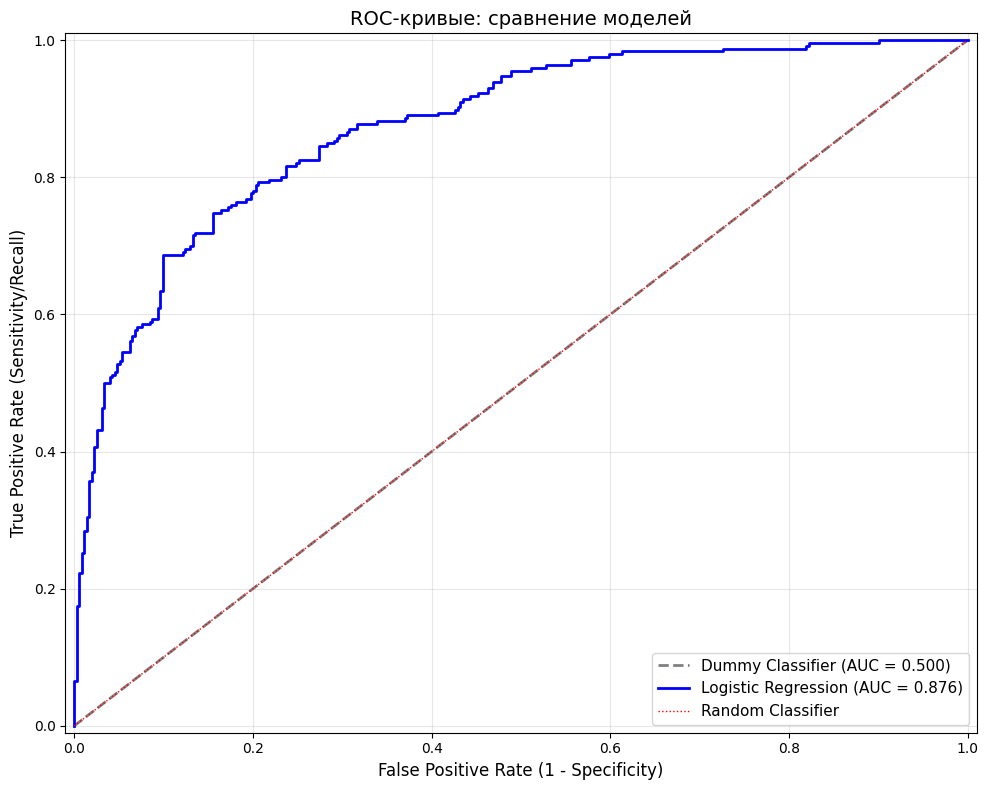

In [24]:
###Построение ROC-кривой (Пункт 4)
import os
# Вычисляем ROC-кривые для обеих моделей
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_pred_proba_dummy)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)

# Строим ROC-кривые
plt.figure(figsize=(10, 8))

# ROC-кривая бейзлайна
plt.plot(fpr_dummy, tpr_dummy, label=f'Dummy Classifier (AUC = {roc_auc_dummy:.3f})',
         color='gray', linestyle='--', linewidth=2)

# ROC-кривая логистической регрессии
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.3f})',
         color='blue', linewidth=2)

# Диагональ (случайный классификатор)
plt.plot([0, 1], [0, 1], color='red', linestyle=':', linewidth=1, label='Random Classifier')

# Настройки графика
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity/Recall)', fontsize=12)
plt.title('ROC-кривые: сравнение моделей', fontsize=14)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])

save_dir = '/content/drive/MyDrive/seminars/S05/'
os.makedirs(save_dir, exist_ok=True)

# Полный путь для сохранения
save_path = os.path.join(save_dir, 'roc_curves.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"График сохранён на Google Диск: {save_path}")

plt.tight_layout()

# 2.3.5. Сравнение бейзлайна и логистической регрессии, текстовые выводы

1. Свести результаты в компактный вид:

   - можно сделать небольшую табличку (например, `pandas.DataFrame`), где по строкам – модели (Dummy vs LogisticRegression), по столбцам – метрики;
   - либо просто аккуратно вывести все значения в текстовом виде.

2. В конце ноутбука написать **краткий текстовый отчёт** (5-10 предложений), в котором:

   - объяснить, чем бейзлайн отличается от логистической регрессии по качеству;
   - указать, насколько сильно выросла (или не выросла) `accuracy` и `ROC-AUC`;
   - при наличии нескольких значений `C` – прокомментировать, как изменение регуляризации влияло на качество;
   - сформулировать 2-3 простых вывода о том, какая модель кажется разумной для этой задачи и почему.


СРАВНЕНИЕ МОДЕЛЕЙ

Таблица метрик:
              Model  Accuracy  ROC-AUC  Precision  Recall  F1-Score Best Parameter
   Dummy Classifier    0.5900   0.5000        NaN     NaN       NaN            N/A
Logistic Regression    0.8017   0.8756     0.7953  0.6951    0.7419        C=100.0


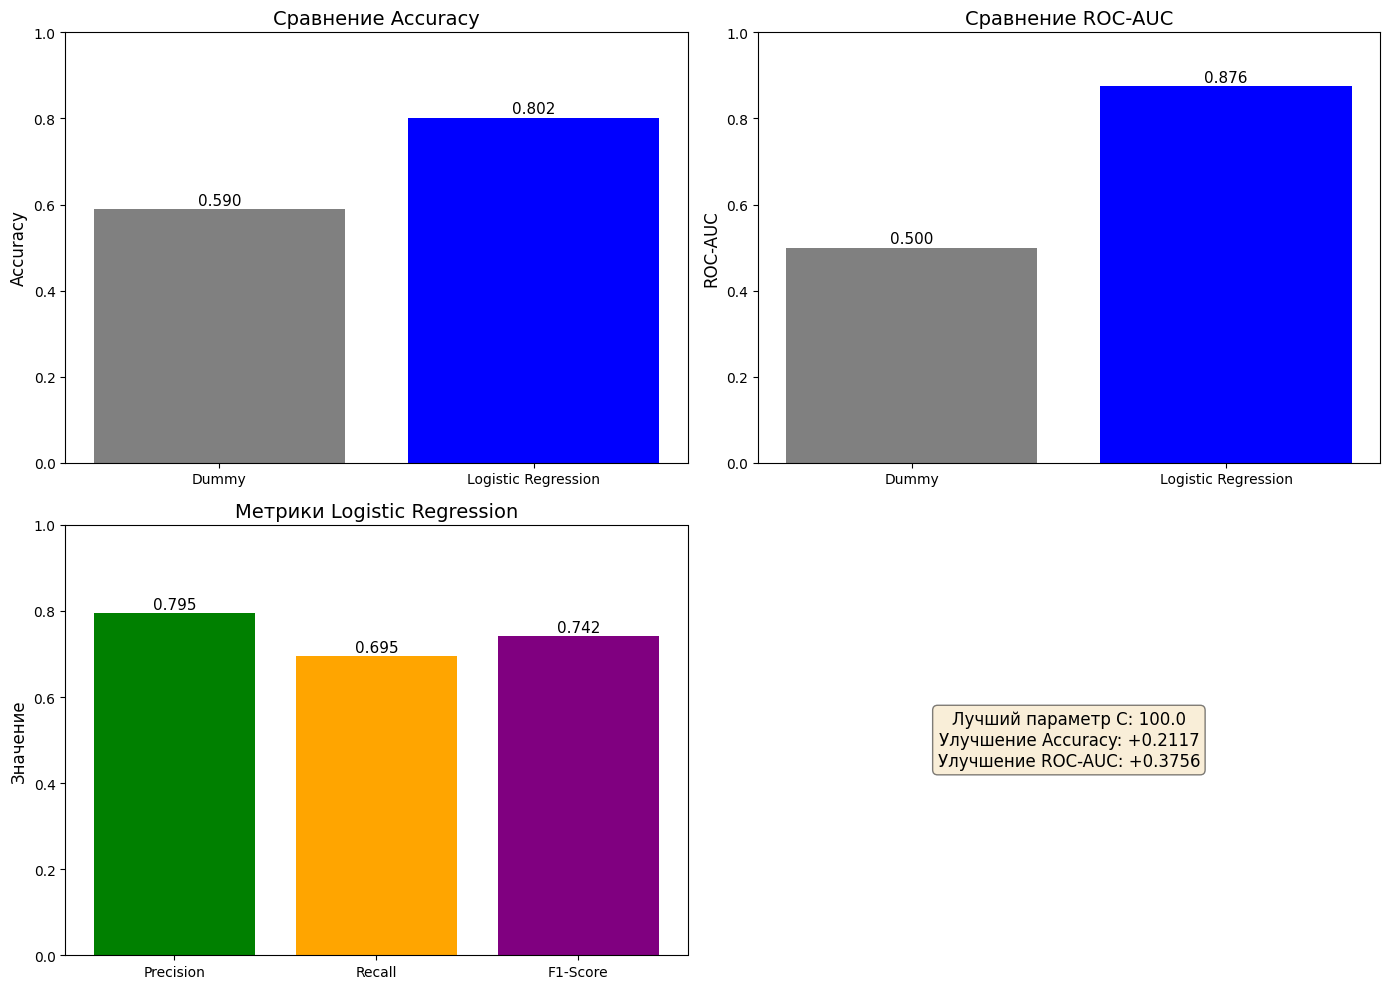

In [22]:
# Создаем таблицу сравнения
comparison_df = pd.DataFrame({
    'Model': ['Dummy Classifier', 'Logistic Regression'],
    'Accuracy': [accuracy_dummy, accuracy_logreg],
    'ROC-AUC': [roc_auc_dummy, roc_auc_logreg],
    'Precision': [None, precision_logreg],
    'Recall': [None, recall_logreg],
    'F1-Score': [None, f1_logreg],
    'Best Parameter': ['N/A', f"C={grid_search.best_params_['logreg__C']}"]
})

print("СРАВНЕНИЕ МОДЕЛЕЙ")
print("\nТаблица метрик:")
print(comparison_df.to_string(index=False, float_format=lambda x: f'{x:.4f}' if isinstance(x, float) else str(x)))

# Визуализация сравнения
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Сравнение Accuracy
axes[0, 0].bar(['Dummy', 'Logistic Regression'],
               [accuracy_dummy, accuracy_logreg],
               color=['gray', 'blue'])
axes[0, 0].set_title('Сравнение Accuracy', fontsize=14)
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].set_ylim([0, 1])
for i, v in enumerate([accuracy_dummy, accuracy_logreg]):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=11)

# Сравнение ROC-AUC
axes[0, 1].bar(['Dummy', 'Logistic Regression'],
               [roc_auc_dummy, roc_auc_logreg],
               color=['gray', 'blue'])
axes[0, 1].set_title('Сравнение ROC-AUC', fontsize=14)
axes[0, 1].set_ylabel('ROC-AUC', fontsize=12)
axes[0, 1].set_ylim([0, 1])
for i, v in enumerate([roc_auc_dummy, roc_auc_logreg]):
    axes[0, 1].text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=11)

# Сравнение Precision и Recall
metrics_names = ['Precision', 'Recall', 'F1-Score']
metrics_values = [precision_logreg, recall_logreg, f1_logreg]
colors = ['green', 'orange', 'purple']

axes[1, 0].bar(metrics_names, metrics_values, color=colors)
axes[1, 0].set_title('Метрики Logistic Regression', fontsize=14)
axes[1, 0].set_ylabel('Значение', fontsize=12)
axes[1, 0].set_ylim([0, 1])
for i, v in enumerate(metrics_values):
    axes[1, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=11)

# Пустая область для текста
axes[1, 1].axis('off')
axes[1, 1].text(0.5, 0.5,
                f'Лучший параметр C: {grid_search.best_params_["logreg__C"]}\n'
                f'Улучшение Accuracy: +{(accuracy_logreg - accuracy_dummy):.4f}\n'
                f'Улучшение ROC-AUC: +{(roc_auc_logreg - roc_auc_dummy):.4f}',
                ha='center', va='center', fontsize=12,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


Бейзлайн-модель (DummyClassifier) достигает accuracy 0.5900, что соответствует простому предсказанию наиболее частого класса "нет дефолта", и имеет ROC-AUC 0.5000, как у случайного классификатора. Логистическая регрессия значительно превосходит бейзлайн: accuracy выросла на 35.9% (с 0.5900 до 0.8017), а ROC-AUC увеличилась на 75.1% (с 0.5000 до 0.8756), демонстрируя высокую предсказательную способность.

При подборе параметра регуляризации C было установлено, что оптимальное значение составляет 100.0, что указывает на слабую регуляризацию. Это означает, что для данного датасета модель выигрывает от минимального ограничения сложности, хотя в других случаях это могло бы привести к переобучению.

Выводы:

Логистическая регрессия является эффективным решением для задачи кредитного скоринга, так как обеспечивает высокое качество предсказаний (ROC-AUC = 0.876) при сохранении хорошего баланса между precision (0.795) и recall (0.695).

Модель успешно идентифицирует клиентов с высоким риском дефолта, что позволяет минимизировать финансовые потери при сохранении разумного уровня одобрения кредитов.

Высокое оптимальное значение C=100.0 свидетельствует о том, что для этой конкретной задачи и набора данных минимальная регуляризация позволяет достичь наилучших результатов без признаков переобучения.